## Example Use of $\texttt{gw_remnant}$ package
### with customized waveforms the user would like to use

to compute remant properties of binary black hole mergers given waveform generated from various models

Contact : Tousif Islam [tislam@umassd.edu]  [tousifislam24@gmail.com] 

### Import gw_remnant

In [1]:
import numpy as np
import sys
path_to_gwremnant = "/home/UMDAR.UMASSD.EDU/tislam/work/gw_remnant_update_Feb12_2024/gw_remnant/"
sys.path.append(path_to_gwremnant)
import gw_remnant
# we only need the GWRemnantCalculator
from gw_remnant.gw_remnant_calculator import GWRemnantCalculator

In [2]:
help(GWRemnantCalculator)

Help on class GWRemnantCalculator in module gw_remnant.gw_remnant_calculator:

class GWRemnantCalculator(gw_remnant.gw_utils.gw_plotter.GWPlotter, gw_remnant.remnant_calculators.peak_luminosity_calculator.PeakLuminosityCalculator, gw_remnant.remnant_calculators.remnant_spin_calculator.AngularMomentumCalculator, gw_remnant.remnant_calculators.kick_velocity_calculator.LinearMomentumCalculator, gw_remnant.remnant_calculators.remnant_mass_calculator.RemnantMassCalculator, gw_remnant.remnant_calculators.initial_energy_momenta.InitialEnergyMomenta)
 |  GWRemnantCalculator(time, hdict, qinput, spin1_input=None, spin2_input=None, ecc_input=None, E_initial=None, L_initial=None, M_initial=1, use_filter=False)
 |  
 |  Class to compute the following remnant quantities from a given waveform;
 |      (i) h_dot : derivative of the input waveform in dictionary format
 |      (ii) E_dot : enrgy flux as a function of time
 |      (iii) E_rad : total energy radiated
 |      (iv) Eoft : radiated energy a

### Load waveforms from a file
We basically need to have a time axis for a waveform and a dictionary containing all modes as input to $\texttt{gw_remnant}$

In [3]:
data = np.load("q8_NR.npy", allow_pickle=True)

In [4]:
## mass ratio
q = 8

## create a waveform dictionary
wf = {}
for key in data.item():
    # get the time 
    if key=='t':
        time = data.item()[key]
    # get modes
    else:
        wf[key] = data.item()[key]

### Compute remant properties from waveforms

In [5]:
# calculate remnant properties
rnr = GWRemnantCalculator(time=time, hdict=wf, qinput=q)

### Print remnant properties

In [6]:
# remnant properties from NRHybSur3dq8 model
rnr.print_remnants()

Mass ratio : 8.000
Initial mass : 1.00000000 M
Total enery radiated : 0.01041019 M
Peak luminosity : 0.00080655 
Remnant mass : 0.98958981 M
Remnant spin (dimensionless) : 0.30779036 M
Remnant kick velocity : 0.00025646 c


In [7]:
# peak kick velocity
rnr.peak_kick

0.00031875087803050954

### Plot energy and momentum profiles

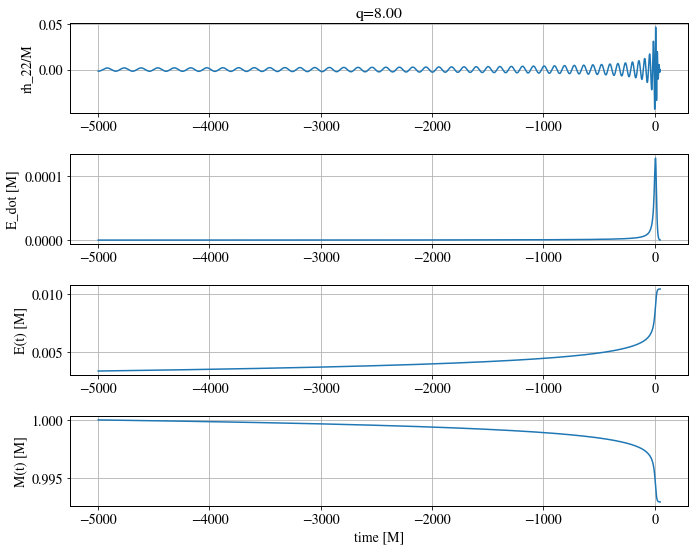

In [8]:
rnr.plot_mass_energy()

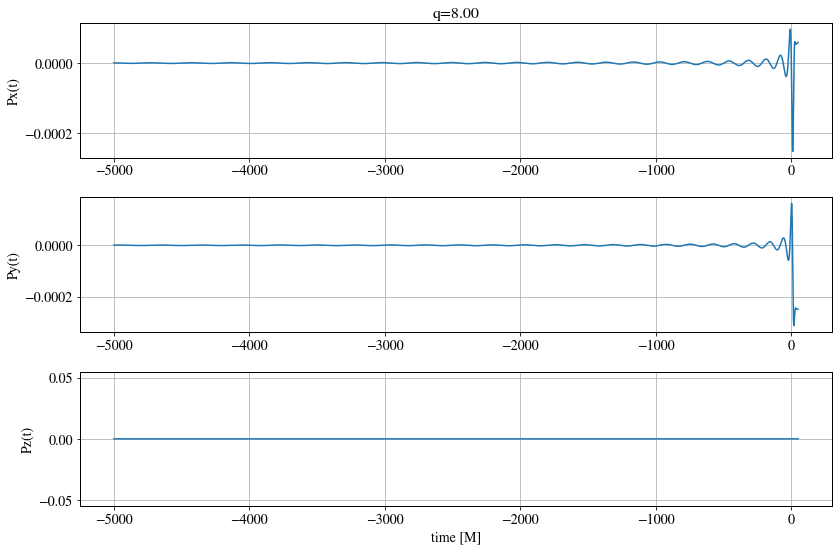

In [9]:
rnr.plot_linear_momentum()

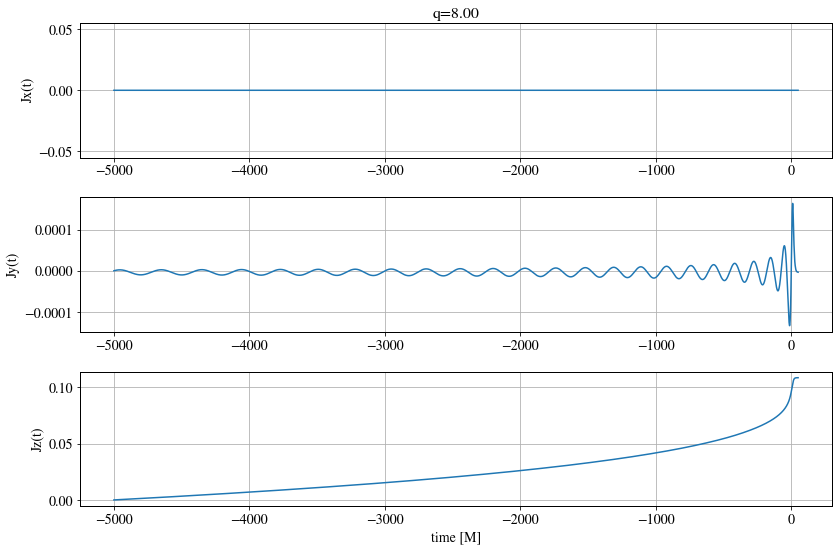

In [10]:
rnr.plot_angular_momentum()

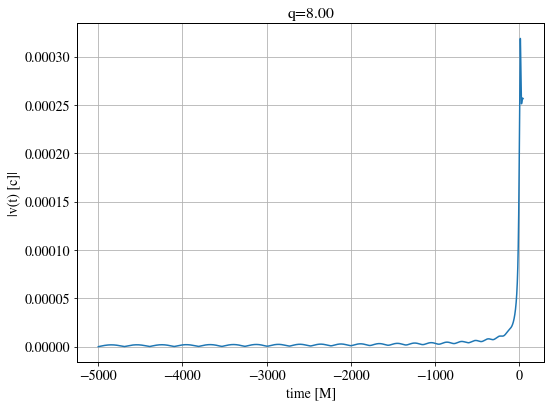

In [11]:
rnr.plot_kick_velocity()